In [1]:
#importing libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
A=pd.read_excel("/Users/HP/Downloads/Datasets/Attrition Case Study.xlsx")

In [3]:
pd.set_option("display.max_columns",500)
pd.set_option("display.width",1000)

In [4]:
#preview of dataset
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# heatmap for correlation

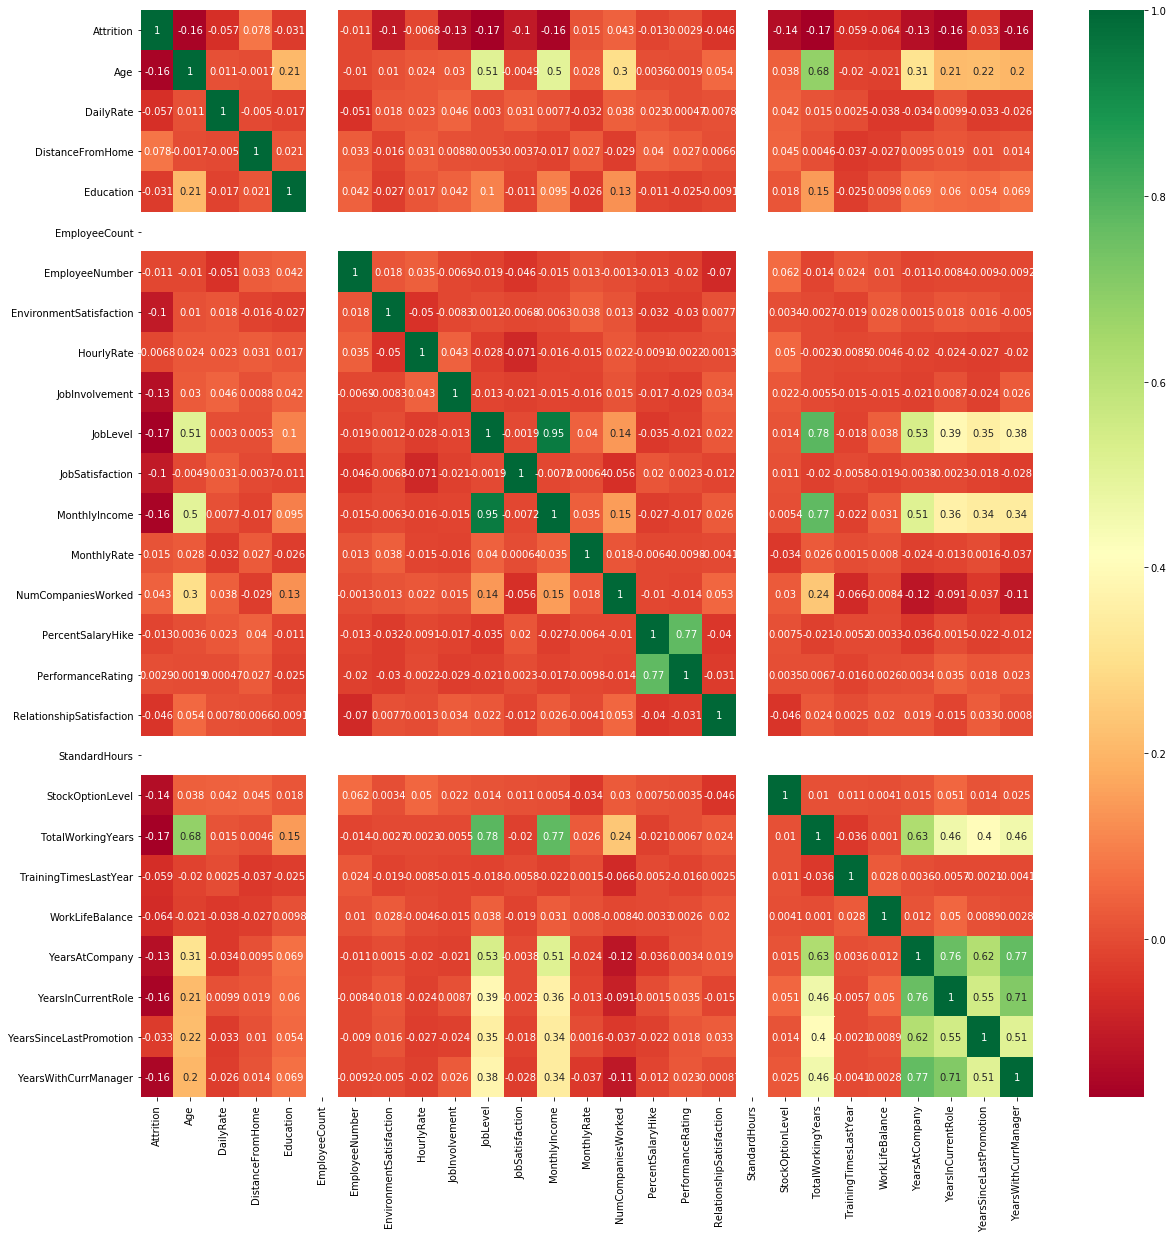

In [5]:
#correlation of data
b = plt.subplots(figsize=(20,20))
sb.heatmap(A.corr(),annot=True,cmap="RdYlGn")

In [6]:
#splitting rows and columns in categorical and continuos
CAT=[]
CON=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        CAT.append(i)
    else:
        CON.append(i)

# Univariate analysis - analysis of one column

In [7]:
A.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

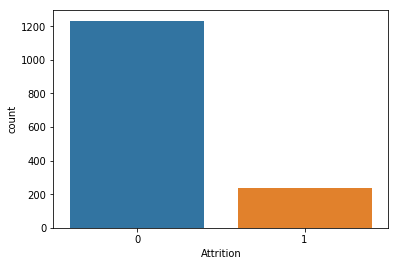

In [8]:
sb.countplot(A.Attrition)

# Bivariate analysis- analysis of two variables

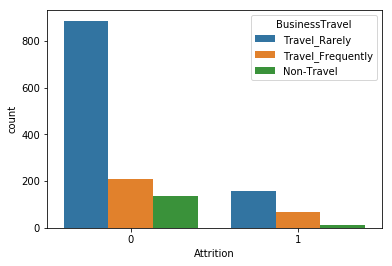

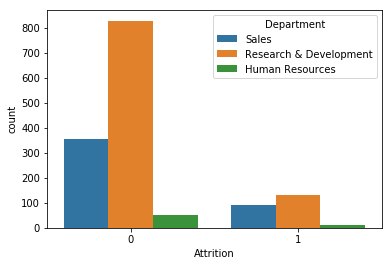

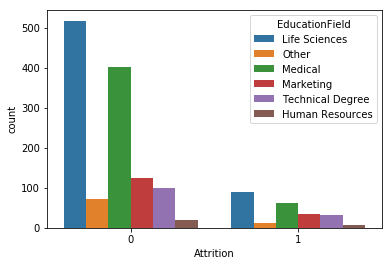

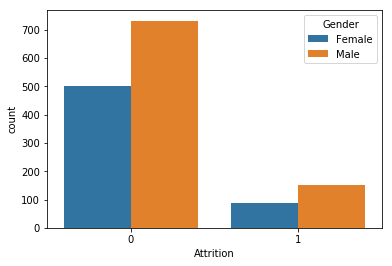

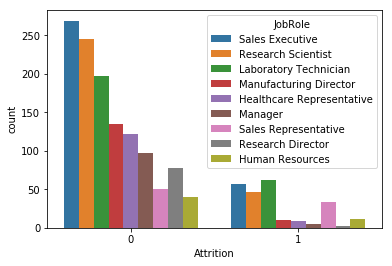

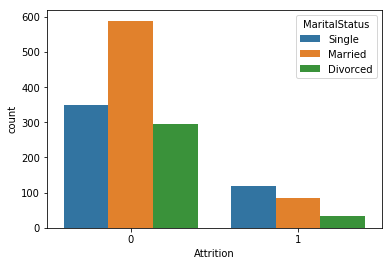

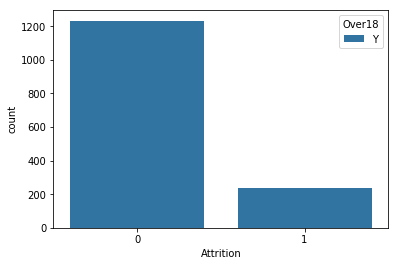

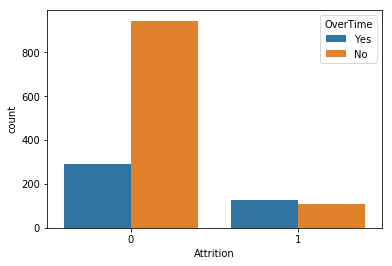

In [9]:
#bivariate analysis
for i in CAT:
    sb.countplot(A.Attrition,hue=A[i])
    plt.show()

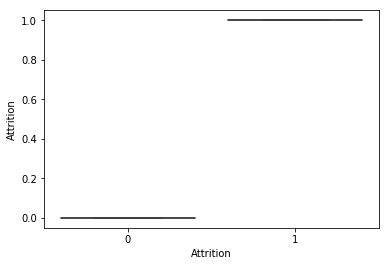

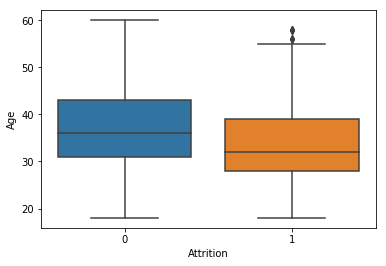

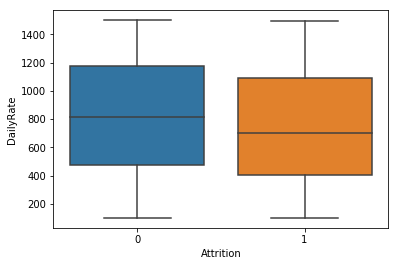

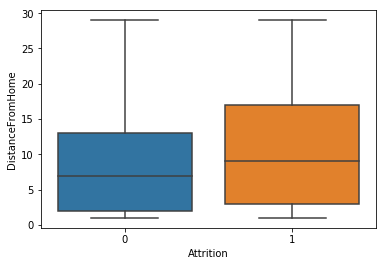

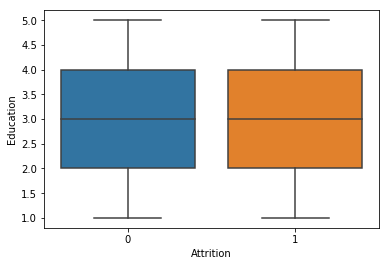

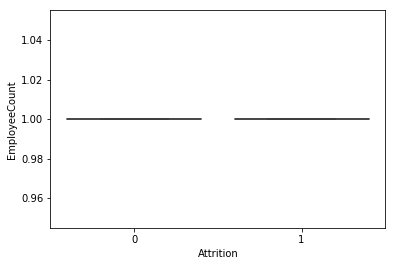

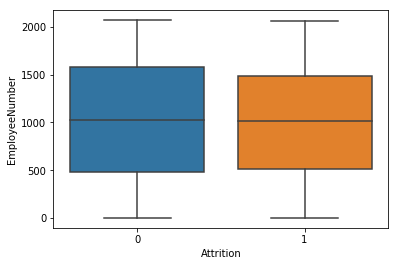

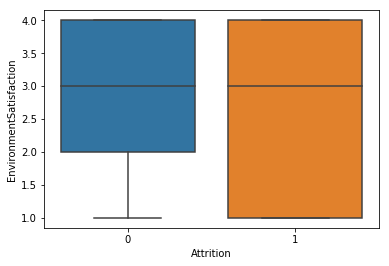

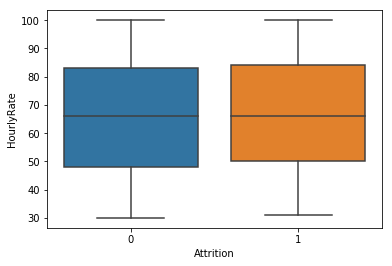

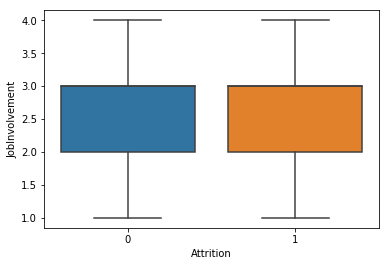

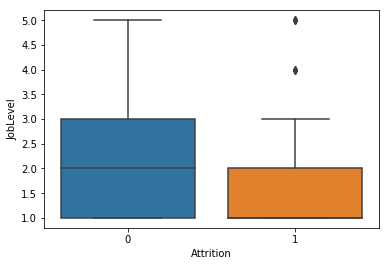

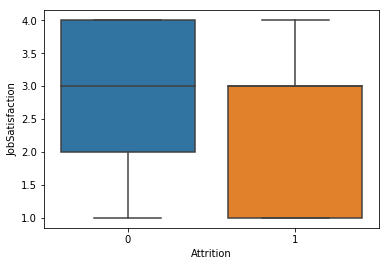

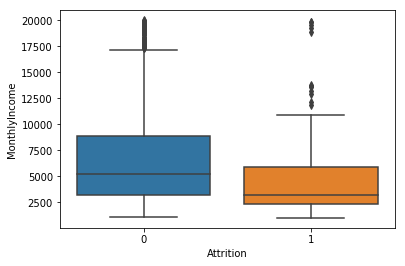

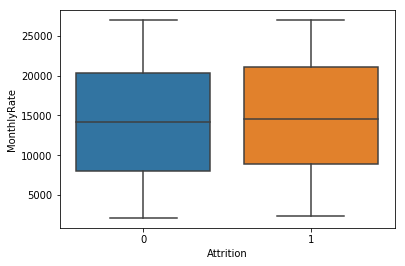

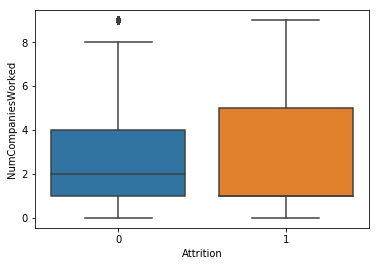

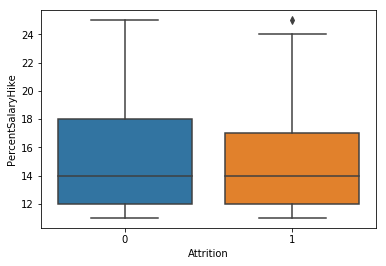

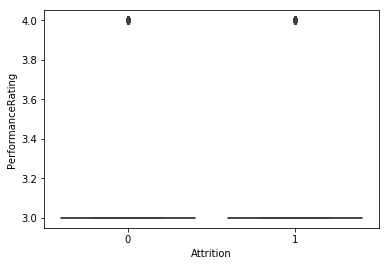

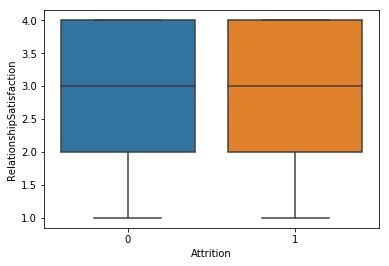

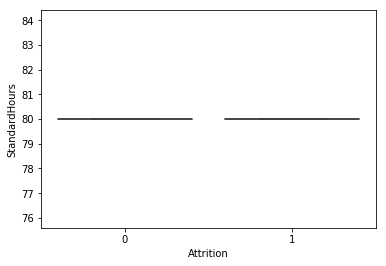

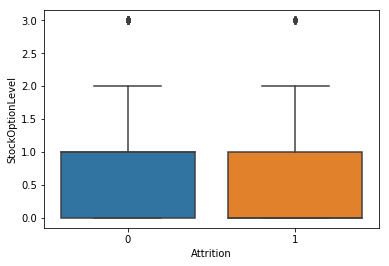

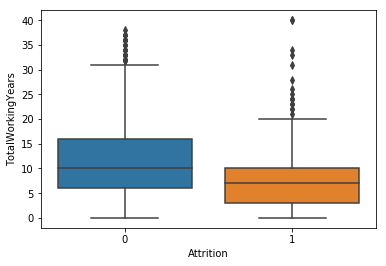

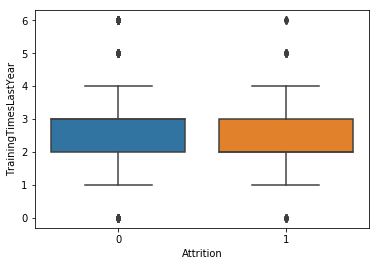

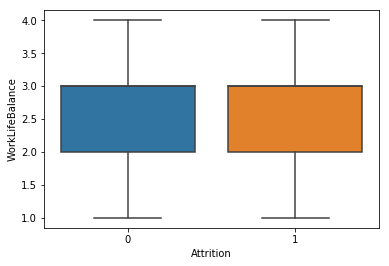

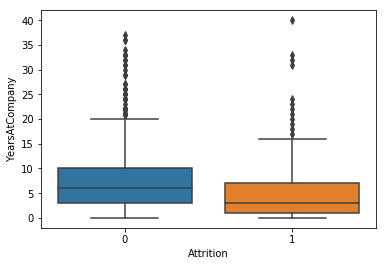

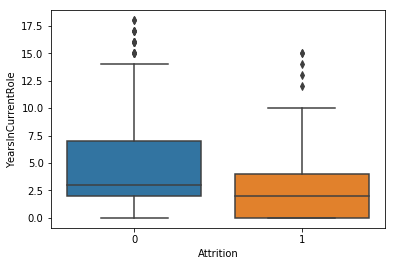

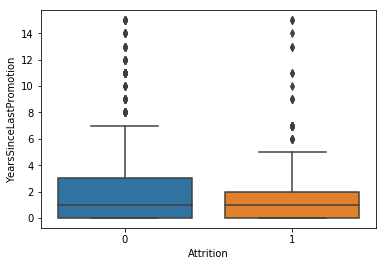

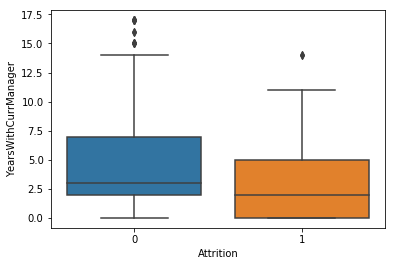

In [10]:
for i in CON:
    sb.boxplot(A.Attrition, A[i])
    plt.show()

# Random forest

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A=A.apply(le.fit_transform)

In [12]:
Y=A[["Attrition"]]
X=A.drop(['Attrition'], axis=1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.20, random_state=40)

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10, max_depth=11)
model=rfc.fit(xtrain, ytrain)
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
print("accuracy is %.2f"%(accuracy_score(ytest, pred)*100))

accuracy is 83.67


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [13]:
from sklearn.model_selection import GridSearchCV
tp={"max_depth":range(2,20,1)}
rfr=RandomForestClassifier()
cv=GridSearchCV(rfr, tp, scoring="accuracy", cv=4)
cvmodel=cv.fit(X,Y)
cvmodel.best_params_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed whe

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed whe

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed whe

{'max_depth': 6}

<BarContainer object of 34 artists>

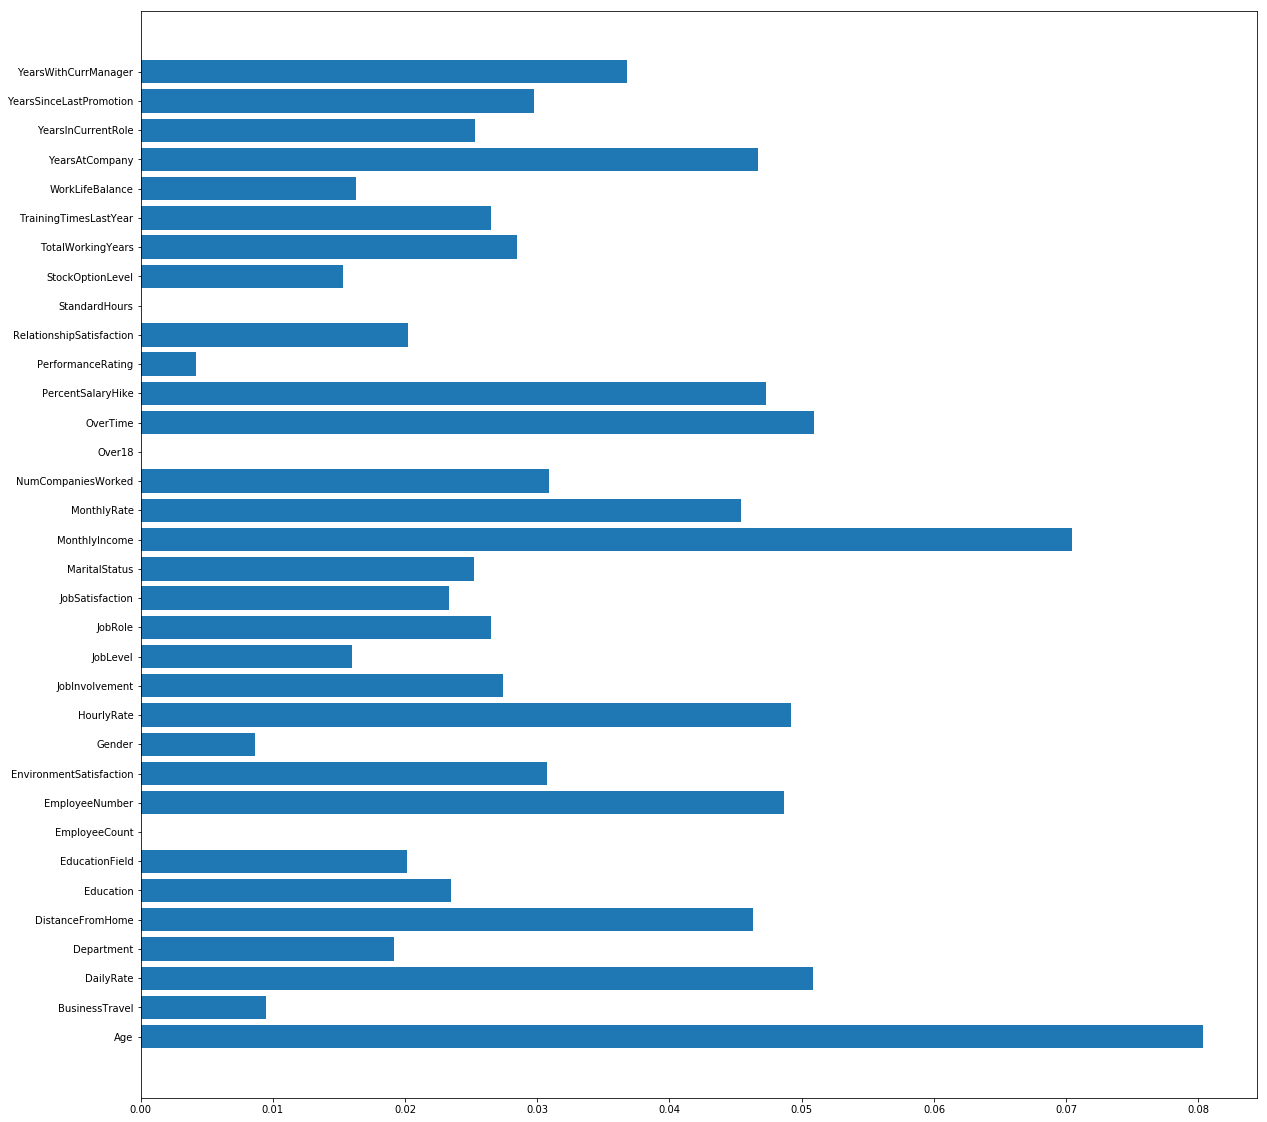

In [14]:
b=plt.subplots(figsize=(20,20))
plt.barh(X.columns, model.feature_importances_)

In [15]:
model.feature_importances_

array([0.08037793, 0.00947905, 0.0508468 , 0.01915781, 0.04630882,
       0.02350653, 0.02017774, 0.        , 0.04863367, 0.03076254,
       0.00863568, 0.04920588, 0.02741231, 0.01596996, 0.02653652,
       0.02333879, 0.02519888, 0.07043809, 0.04543174, 0.03087   ,
       0.        , 0.05092387, 0.04732182, 0.00421258, 0.02022166,
       0.        , 0.0152819 , 0.02844288, 0.02649653, 0.01629561,
       0.04668129, 0.02530269, 0.0297672 , 0.03676324])

In [16]:
X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')

In [17]:
w=pd.DataFrame(zip(X.columns, model.feature_importances_), columns=['columns','importance'])

In [18]:
w=w.sort_values(by='importance')

In [19]:
w

,columns,importance
20,Over18,0.000000
7,EmployeeCount,0.000000
25,StandardHours,0.000000
23,PerformanceRating,0.004213
10,Gender,0.008636
1,BusinessTravel,0.009479
26,StockOptionLevel,0.015282
13,JobLevel,0.015970
29,WorkLifeBalance,0.016296
3,Department,0.019158


<BarContainer object of 34 artists>

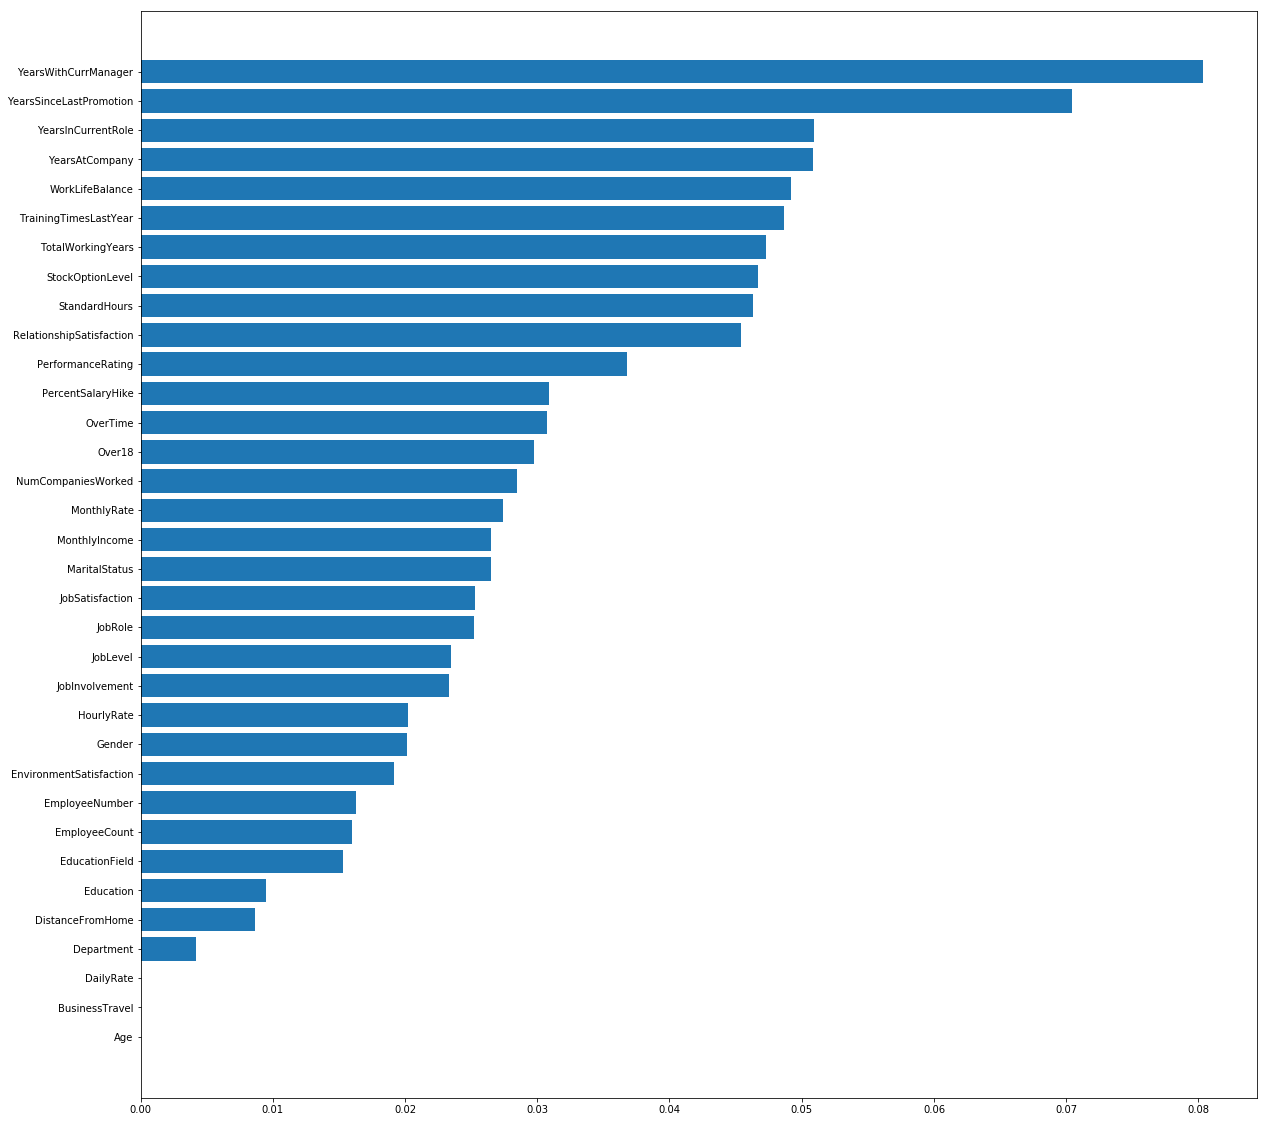

In [20]:
b=plt.subplots(figsize=(20,20))
plt.barh(X.columns, w.importance)

In [ ]:
#from the above analysis we have predict that we can predict attrition on the base of columns 
1- DistanceFromHome
2- NumCompaniesWorked
3- YearsAtCompany